# Практическое задание 3
## Tensorflow
### 1. Попробуйте улучшить работу нейронной сети(разобранную на уроке) обучавшейся на датасет Fashion-MNIST. <br>Опишите в комментарии к уроку - какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

## Решение

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Загружаем и подготавливаем набор данных

In [2]:
%%capture
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

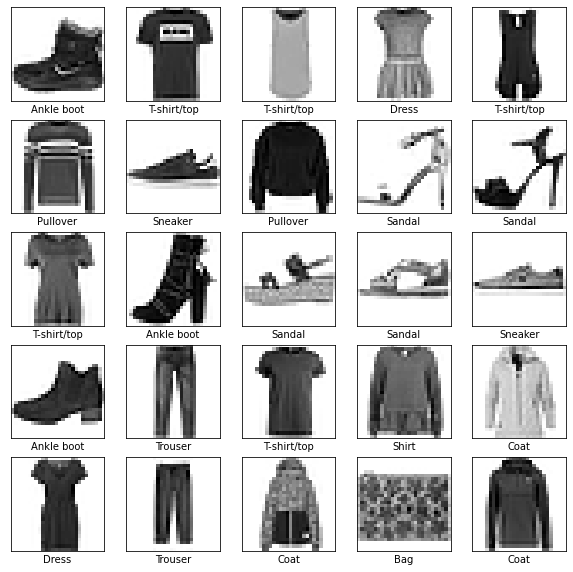

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    plt.xticks([]); plt.yticks([])
    plt.grid(False)
plt.show()

In [5]:
train_images = train_images.astype(np.float32) / 255
test_images = test_images.astype(np.float32) / 255

### Определяем сети
Попробуем несколько разных сетей, чтобы потом сравнить их процесс обучения


In [6]:
models = dict()

models['128'] = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

models['128_64'] = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

models['128_64_32'] = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

models['128_dropout05'] = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(10, activation='softmax')])

models['128_l2'] = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax')])

models['128_64_dropout05'] = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(10, activation='softmax')])

models['128_64_l2'] = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax')])

models['128_64_32_dropout05'] = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(.5),
    tf.keras.layers.Dense(10, activation='softmax')])

models['128_64_32_l2'] = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax')])

### Компиляция модели

In [7]:
for key in models:
    models[key].compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])


### Обучение модели

In [8]:
%%time
n_epochs = 20
histories = dict()

for key in models:
    print(f'Обучение модели {key}...')
    histories[key] = models[key].fit(
        train_images, 
        train_labels,
        validation_data = (test_images, test_labels), 
        epochs=n_epochs,
        verbose=0)

Обучение модели 128...
Обучение модели 128_64...
Обучение модели 128_64_32...
Обучение модели 128_dropout05...
Обучение модели 128_l2...
Обучение модели 128_64_dropout05...
Обучение модели 128_64_l2...
Обучение модели 128_64_32_dropout05...
Обучение модели 128_64_32_l2...
CPU times: user 10min 23s, sys: 1min 5s, total: 11min 29s
Wall time: 8min 27s


### Теперь посмотрим, какая модель лучше обучалась

Использую готовую функцию из документации TF https://www.tensorflow.org/tutorials/keras/overfit_and_underfit

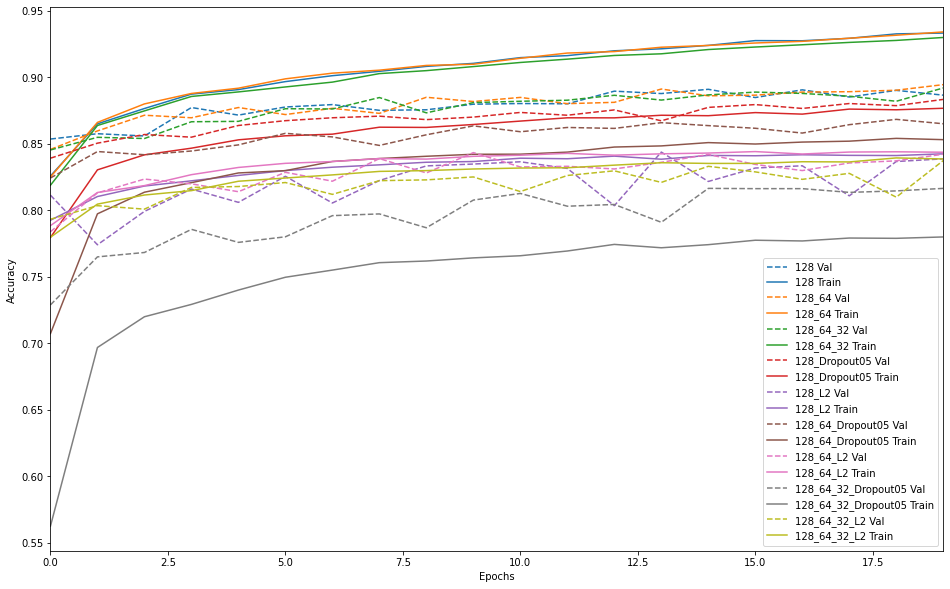

In [9]:
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])


plot_history(histories.items())

### Выводы
Увеличение числа слоев и числа нейронов может давать прирост в точности.
Увеличение количества эпох время обучения. При большом количестве эпох с переобучением помогает справиться регуляризация и Dropout слои.

### 2. Поработайте с документацией TensorFlow 2. Попробуйте найти полезные команды TensorFlow неразобранные на уроке.

Часто бывает полезно визуально посомтреть на архитектуру сети. Для этого есть два способа:

In [10]:
models['128_64_32_dropout05'].summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)               

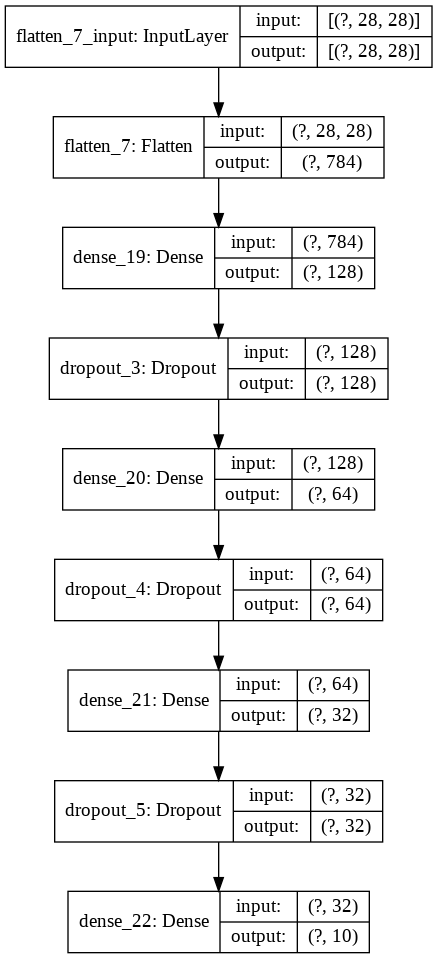

In [11]:
tf.keras.utils.plot_model(models['128_64_32_dropout05'], show_shapes=True)